## Custom Training Loops in Keras

In [1]:
import os
import warnings
import tensorflow as tf 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.callbacks import Callback
import numpy as np

# Suppress all Python warnings
warnings.filterwarnings('ignore')

# Set TensorFlow log level to suppress warnings and info messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Step 1: Set Up the Environment
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 
x_train, x_test = x_train / 255.0, x_test / 255.0 
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)


In [2]:
# Step 2: Define the Model

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

In [3]:
# Step 3: Define Loss Function and Optimizer

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 
optimizer = tf.keras.optimizers.Adam()

In [4]:
# Step 4: Implement the Custom Training Loop

epochs = 2
# train_dataset = train_dataset.repeat(epochs)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
for epoch in range(epochs):
    print(f'Start of epoch {epoch + 1}')

    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)  # Forward pass
            loss_value = loss_fn(y_batch_train, logits)  # Compute loss

        # Compute gradients and update weights
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Logging the loss every 200 steps
        if step % 200 == 0:
            print(f'Epoch {epoch + 1} Step {step}: Loss = {loss_value.numpy()}')

Start of epoch 1
Epoch 1 Step 0: Loss = 2.3743958473205566
Epoch 1 Step 200: Loss = 0.39980998635292053
Epoch 1 Step 400: Loss = 0.1824227124452591
Epoch 1 Step 600: Loss = 0.190804585814476
Epoch 1 Step 800: Loss = 0.21089746057987213
Epoch 1 Step 1000: Loss = 0.48431193828582764
Epoch 1 Step 1200: Loss = 0.1345197856426239
Epoch 1 Step 1400: Loss = 0.26571205258369446
Epoch 1 Step 1600: Loss = 0.23788246512413025
Epoch 1 Step 1800: Loss = 0.15216906368732452
Start of epoch 2
Epoch 2 Step 0: Loss = 0.0945412814617157
Epoch 2 Step 200: Loss = 0.1728932112455368
Epoch 2 Step 400: Loss = 0.11890389025211334
Epoch 2 Step 600: Loss = 0.08480465412139893
Epoch 2 Step 800: Loss = 0.10181252658367157
Epoch 2 Step 1000: Loss = 0.28182512521743774
Epoch 2 Step 1200: Loss = 0.05708758533000946
Epoch 2 Step 1400: Loss = 0.16776081919670105
Epoch 2 Step 1600: Loss = 0.1877271980047226
Epoch 2 Step 1800: Loss = 0.08635355532169342


### Adding Accuracy Metric

In [5]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten 

# Step 1: Set Up the Environment
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0 

# Create a batched dataset for training
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

In [6]:
# Step 2: Define the Model

model = Sequential([ 
    Flatten(input_shape=(28, 28)),  # Flatten the input to a 1D vector
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons and ReLU activation
    Dense(10)  # Output layer with 10 neurons for the 10 classes (digits 0-9)
])

In [7]:
# Step 3: Define Loss Function, Optimizer, and Metric

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)  # Loss function for multi-class classification
optimizer = tf.keras.optimizers.Adam()  # Adam optimizer for efficient training
accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy()  # Metric to track accuracy during training

In [8]:
# Step 4: Implement the Custom Training Loop with Accuracy

epochs = 5  # Number of epochs for training

for epoch in range(epochs):
    print(f'Start of epoch {epoch + 1}')
    
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # Forward pass: Compute predictions
            logits = model(x_batch_train, training=True)
            # Compute loss
            loss_value = loss_fn(y_batch_train, logits)
        
        # Compute gradients
        grads = tape.gradient(loss_value, model.trainable_weights)
        # Apply gradients to update model weights
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        # Update the accuracy metric
        accuracy_metric.update_state(y_batch_train, logits)

        # Log the loss and accuracy every 200 steps
        if step % 200 == 0:
            print(f'Epoch {epoch + 1} Step {step}: Loss = {loss_value.numpy()} Accuracy = {accuracy_metric.result().numpy()}')
    
    # Reset the metric at the end of each epoch
    accuracy_metric.reset_state()

Start of epoch 1
Epoch 1 Step 0: Loss = 2.3632686138153076 Accuracy = 0.1875
Epoch 1 Step 200: Loss = 0.4184502363204956 Accuracy = 0.8347325921058655
Epoch 1 Step 400: Loss = 0.1777428388595581 Accuracy = 0.8687655925750732
Epoch 1 Step 600: Loss = 0.1555330902338028 Accuracy = 0.8844113945960999
Epoch 1 Step 800: Loss = 0.20300383865833282 Accuracy = 0.8966526389122009
Epoch 1 Step 1000: Loss = 0.3931822180747986 Accuracy = 0.9040022492408752
Epoch 1 Step 1200: Loss = 0.15781570971012115 Accuracy = 0.9107774496078491
Epoch 1 Step 1400: Loss = 0.1900905966758728 Accuracy = 0.915662944316864
Epoch 1 Step 1600: Loss = 0.21526694297790527 Accuracy = 0.9188007712364197
Epoch 1 Step 1800: Loss = 0.14350934326648712 Accuracy = 0.922751247882843
Start of epoch 2
Epoch 2 Step 0: Loss = 0.08563232421875 Accuracy = 1.0
Epoch 2 Step 200: Loss = 0.17792275547981262 Accuracy = 0.961442768573761
Epoch 2 Step 400: Loss = 0.10861668735742569 Accuracy = 0.9585411548614502
Epoch 2 Step 600: Loss = 0.04

### Custom Callback for Advanced Logging

In [9]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten 

# Step 1: Set Up the Environment
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0 

# Create a batched dataset for training
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

In [10]:
# Step 2: Define the Model

model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input to a 1D vector
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons and ReLU activation
    Dense(10)  # Output layer with 10 neurons for the 10 classes (digits 0-9)
])

In [11]:
# Step 3: Define Loss Function, Optimizer, and Metric

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)  # Loss function for multi-class classification
optimizer = tf.keras.optimizers.Adam()  # Adam optimizer for efficient training
accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy()  # Metric to track accuracy during training

In [12]:
from tensorflow.keras.callbacks import Callback

# Step 4: Implement the Custom Callback 
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        print(f'End of epoch {epoch + 1}, loss: {logs.get("loss")}, accuracy: {logs.get("accuracy")}')

In [13]:
# Step 5: Implement the Custom Training Loop with Custom Callback

epochs = 2
custom_callback = CustomCallback()  # Initialize the custom callback

for epoch in range(epochs):
    print(f'Start of epoch {epoch + 1}')
    
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # Forward pass: Compute predictions
            logits = model(x_batch_train, training=True)
            # Compute loss
            loss_value = loss_fn(y_batch_train, logits)
        
        # Compute gradients
        grads = tape.gradient(loss_value, model.trainable_weights)
        # Apply gradients to update model weights
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
        # Update the accuracy metric
        accuracy_metric.update_state(y_batch_train, logits)

        # Log the loss and accuracy every 200 steps
        if step % 200 == 0:
            print(f'Epoch {epoch + 1} Step {step}: Loss = {loss_value.numpy()} Accuracy = {accuracy_metric.result().numpy()}')
    
    # Call the custom callback at the end of each epoch
    custom_callback.on_epoch_end(epoch, logs={'loss': loss_value.numpy(), 'accuracy': accuracy_metric.result().numpy()})
    
    # Reset the metric at the end of each epoch
    accuracy_metric.reset_state()  # Use reset_state() instead of reset_states()


Start of epoch 1
Epoch 1 Step 0: Loss = 2.3990375995635986 Accuracy = 0.125
Epoch 1 Step 200: Loss = 0.38822653889656067 Accuracy = 0.8392412662506104
Epoch 1 Step 400: Loss = 0.20411020517349243 Accuracy = 0.8675966262817383
Epoch 1 Step 600: Loss = 0.18734461069107056 Accuracy = 0.8819155693054199
Epoch 1 Step 800: Loss = 0.15861785411834717 Accuracy = 0.8939996957778931
Epoch 1 Step 1000: Loss = 0.4058365821838379 Accuracy = 0.9011925458908081
Epoch 1 Step 1200: Loss = 0.18550646305084229 Accuracy = 0.9075250029563904
Epoch 1 Step 1400: Loss = 0.2811054587364197 Accuracy = 0.9122948050498962
Epoch 1 Step 1600: Loss = 0.27342554926872253 Accuracy = 0.9158728718757629
Epoch 1 Step 1800: Loss = 0.1698465347290039 Accuracy = 0.9196279644966125
End of epoch 1, loss: 0.03275144845247269, accuracy: 0.9216333627700806
Start of epoch 2
Epoch 2 Step 0: Loss = 0.0906425416469574 Accuracy = 0.96875
Epoch 2 Step 200: Loss = 0.18414810299873352 Accuracy = 0.9609763622283936
Epoch 2 Step 400: Loss

### Add Hidden Layers

In [14]:
from tensorflow.keras.layers import Input, Dense

# Define the input layer
input_layer = Input(shape=(28, 28))  # Input layer with shape (28, 28)

# Define hidden layers
hidden_layer1 = Dense(64, activation='relu')(input_layer)  # First hidden layer with 64 neurons and ReLU activation
hidden_layer2 = Dense(64, activation='relu')(hidden_layer1)  # Second hidden layer with 64 neurons and ReLU activation

### Define the output layer

In [15]:
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

### Create the Model

In [16]:
model = Model(inputs=input_layer, outputs=output_layer)

### Compile the Model

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np

# Step 1: Redefine the Model for 20 features
model = Sequential([
    Input(shape=(20,)),  # Adjust input shape to (20,)
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer for binary classification with sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 2: Generate Example Data
X_train = np.random.rand(1000, 20)  # 1000 samples, 20 features each
y_train = np.random.randint(2, size=(1000, 1))  # 1000 binary labels (0 or 1)

# Step 3: Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5074 - loss: 0.6950 
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5248 - loss: 0.6921
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5101 - loss: 0.6903
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5703 - loss: 0.6856
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5300 - loss: 0.6883 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6060 - loss: 0.6817
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5323 - loss: 0.6812 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6261 - loss: 0.6738
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5627 - loss: 0.6812
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5574 - loss: 0.6754


### Evaluate the Model

In [19]:
# Example test data (in practice, use real dataset)
X_test = np.random.rand(200, 20)  # 200 samples, 20 features each
y_test = np.random.randint(2, size=(200, 1))  # 200 binary labels (0 or 1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print test loss and accuracy
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5162 - loss: 0.7041  
Test loss: 0.7079513072967529
Test accuracy: 0.48500001430511475


### Exercise 1: Basic Custom Training Loop


- Set up the environment and load the dataset. 

- Define the model with a Flatten layer and two Dense layers. 

- Define the loss function and optimizer. 

- Implement a custom training loop to iterate over the dataset, compute the loss, and update the model's weights. 


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)

model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

for epoch in range(5):
    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            logits = model(x_batch, training =True)
            loss = loss_fn(y_batch, logits)
        grads = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
    print(f'Epoch {epoch+1}: Loss= {loss.numpy()}')

Epoch 1: Loss= 0.034112349152565
Epoch 2: Loss= 0.03041655756533146
Epoch 3: Loss= 0.03094700165092945
Epoch 4: Loss= 0.0417451485991478
Epoch 5: Loss= 0.023672671988606453


### Exercise 2: Adding Accuracy Metric

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)

model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()
accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for epoch in range(5):
    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            logits = model(x_batch, training =True)
            loss = loss_fn(y_batch, logits)
        grads = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        accuracy_metric.update_state(y_batch, logits)
    print(f'Epoch {epoch+1}: Loss= {loss.numpy()} Accuracy = {accuracy_metric.result().numpy()}')
    accuracy_metric.reset_state()

Epoch 1: Loss= 0.0343487411737442 Accuracy = 0.9238499999046326
Epoch 2: Loss= 0.055059000849723816 Accuracy = 0.9661166667938232
Epoch 3: Loss= 0.06592924147844315 Accuracy = 0.9775166511535645
Epoch 4: Loss= 0.05747043713927269 Accuracy = 0.9836000204086304
Epoch 5: Loss= 0.021500930190086365 Accuracy = 0.9884499907493591


### Exercise 3: Custom Callback for Advanced Logging

In [23]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten 

(x_train, y_train), _ = tf.keras.datasets.mnist.load_data() 
x_train = x_train / 255.0 
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32) 

model = Sequential([ 
    Flatten(input_shape=(28, 28)), 
    Dense(128, activation='relu'), 
    Dense(10) 
]) 

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 
optimizer = tf.keras.optimizers.Adam() 
accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy() 

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'End of epoch {epoch+1}, loss: {logs.get('loss')}, accuracy: {logs.get('accuracy')}')

custom_callback = CustomCallback()

epochs = 5 
for epoch in range(epochs): 
    for x_batch, y_batch in train_dataset: 
        with tf.GradientTape() as tape: 
            logits = model(x_batch, training=True) 
            loss = loss_fn(y_batch, logits) 
        grads = tape.gradient(loss, model.trainable_weights) 
        optimizer.apply_gradients(zip(grads, model.trainable_weights)) 
        accuracy_metric.update_state(y_batch, logits) 
    custom_callback.on_epoch_end(epoch, logs={'loss': loss.numpy(), 'accuracy': accuracy_metric.result().numpy()}) 
    accuracy_metric.reset_state()

End of epoch 1, loss: 0.03475452959537506, accuracy: 0.9239333271980286
End of epoch 2, loss: 0.0480518564581871, accuracy: 0.9646999835968018
End of epoch 3, loss: 0.08060084283351898, accuracy: 0.9763166904449463
End of epoch 4, loss: 0.038986414670944214, accuracy: 0.9831833243370056
End of epoch 5, loss: 0.027860203757882118, accuracy: 0.9876999855041504


### Exercise 4: Lab - Hyperparameter Tuning


Modify the tuning loop to save each iteration's results as JSON files.

Specify the directory where these JSON files will be stored for easier retrieval and analysis of tuning results.

In [25]:
# %pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [28]:
import json
import os
import keras_tuner as kt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Step 1: Load your dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Step 2: Define the model-building function
def build_model(hp):
    model = Sequential()
    # Tune the number of units in the first Dense layer
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification example
    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Step 3: Initialize a Keras Tuner RandomSearch tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Set the number of trials
    executions_per_trial=1,  # Set how many executions per trial
    directory='tuner_results',  # Directory for saving logs
    project_name='hyperparam_tuning'
)

# Step 4: Run the tuner search (make sure the data is correct)
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

# Step 5: Save the tuning results as JSON files
try:
    os.makedirs('tuning_results', exist_ok=True)

    for i, trial in enumerate(tuner.oracle.trials.values()):
        results = {
            "trial_id": trial.trial_id,
            "hyperparameters": trial.hyperparameters.values,
            "score": trial.score  # Usually val_accuracy
        }

        with open(os.path.join('tuning_results', f"trial_{i + 1}.json"), "w") as f:
            json.dump(results, f, indent=2)

except IndexError:
    print("Tuning process has not completed or no results available.")

Trial 10 Complete [00h 00m 02s]
val_accuracy: 0.8700000047683716

Best val_accuracy So Far: 0.8849999904632568
Total elapsed time: 00h 00m 17s


In [29]:
best_model = tuner.get_best_models(num_models=1)[0]

loss, accuracy = best_model.evaluate(X_val, y_val)
print(f"Best model validation accuracy: {accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8750 - loss: 0.3074  
Best model validation accuracy: 0.8849999904632568


In [30]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(best_hps.values)


Best hyperparameters:
{'units': 384, 'learning_rate': 0.0017529957488324514}


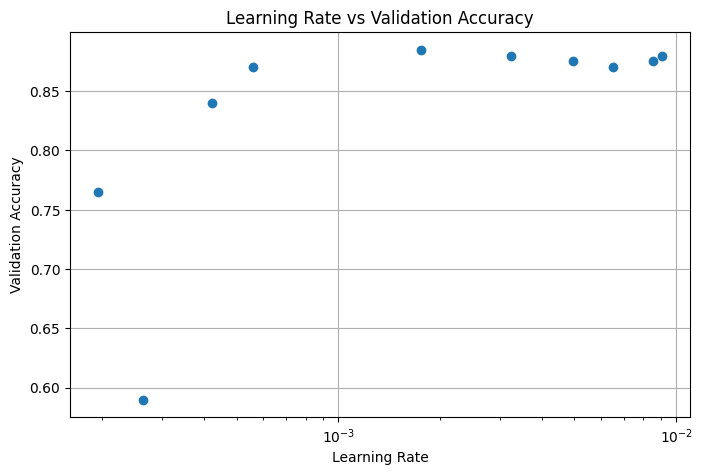

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

trial_data = []
for trial in tuner.oracle.trials.values():
    row = trial.hyperparameters.values
    row['score'] = trial.score
    trial_data.append(row)

df = pd.DataFrame(trial_data)

plt.figure(figsize=(8, 5))
plt.scatter(df['learning_rate'], df['score'])
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.title('Learning Rate vs Validation Accuracy')
plt.grid(True)
plt.show()


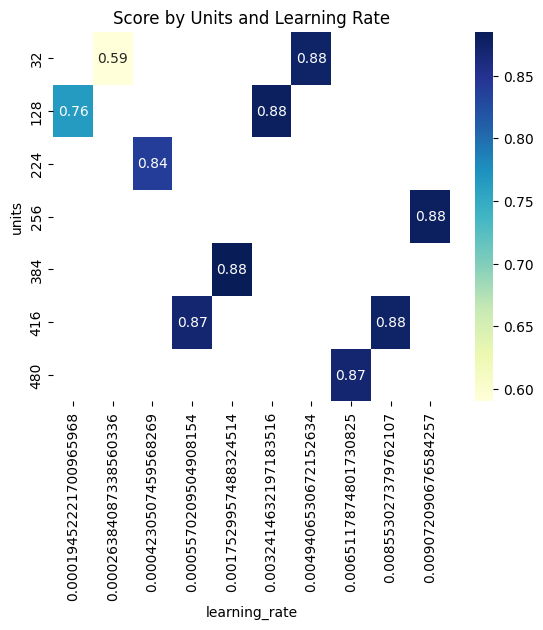

In [ ]:
import seaborn as sns

pivot_table = df.pivot_table(values='score',
                             index='units',
                             columns='learning_rate',
                             aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title("Score by Units and Learning Rate")
plt.show()


Several combinations of units and learning_rate achieved the highest validation accuracy of 0.88.
The best-performing ranges were:

Units: 128 to 416

Learning Rate: 0.001 to 0.005

Very small learning rates (e.g., 0.00019) or low unit sizes (e.g., 32) resulted in lower accuracy.
This suggests that moderate model complexity and learning rates provide better performance for this classification task.